In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats

data = pd.read_csv('https://gist.githubusercontent.com/raquelhr/d1324510056353feeccf111d6b186a0d/raw/7b3bccc7917f3baa7ec1d919195d120083ee75e9/proctatinium_data.csv')
t_values = np.array(data["time"], dtype=float)
count_values = np.array(data["count_rate"], dtype=float)

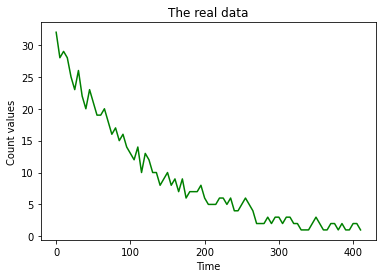

In [2]:
plt.plot(t_values, count_values, color = 'green')
plt.title('The real data')
plt.xlabel('Time')
plt.ylabel('Count values')
plt.show()

In [3]:
def f(lambda0, t):
    return 32*np.exp(-1*lambda0*t) + stats.norm.rvs(loc = 0, scale = 1, size = 1)

def best_lambda():
    return optimize.curve_fit(f, t_values, count_values, 1)

lambda_results = []
for i in range(10000):
    result = best_lambda()
    lambda_results.append(result[0][0])
    
print(lambda_results)

[0.99999996625393, 1.0, 1.0, 0.9999995640712486, 0.9999988555354583, 1.0000000638453885, 1.0, 0.9999998094824715, 1.0000000042866122, 1.0, 1.0000000956859605, 1.0, 0.9999999687478123, 1.0000000506960178, 0.9999998254902855, 0.9999994348373261, 0.9999776986891066, 0.9999992269382295, 1.0, 0.9999855256201602, 1.0000004426885352, 0.9999997678466374, 0.9999999331588852, 1.0000003203127446, 1.0000001113231887, 1.0000000943898426, 1.000000012881364, 0.9999999082855188, 1.0000002576543494, 1.0000000806970906, 1.0000002157318524, 0.9999999470584269, 1.0000002512624668, 1.000000089365174, 1.0000001651309063, 1.0, 1.0000000876668593, 1.0000000421561133, 0.9999999287036498, 0.9999998559038217, 1.0000002202570737, 1.000000116816096, 1.000000642964588, 1.000000103839065, 0.9999997010693614, 1.0000003031538784, 0.9999999801103031, 1.0, 1.0000001059894164, 0.9999998929476654, 1.0000000283346187, 1.0, 0.9999999656265767, 0.9999994312157542, 0.9999998380293964, 1.0, 1.0, 1.0000000595658214, 0.999999630

The mean of lambda results if 1.000000071690997, while the theoretical value is 1.17.
Thus, the absolute error is -0.169999928309003, and relative error is -14.529908402478892%


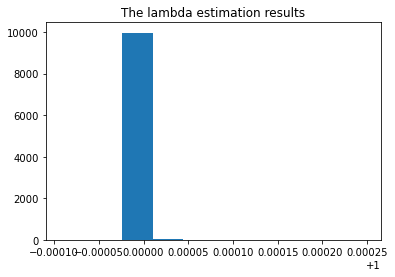

In [4]:
print(f'The mean of lambda results if {np.mean(lambda_results)}, while the theoretical value is 1.17.')
print(f'Thus, the absolute error is {np.mean(lambda_results) - 1.17}, and relative error is {(np.mean(lambda_results) - 1.17)/1.17*100}%')

plt.hist(lambda_results)
plt.title('The lambda estimation results')
plt.show()

#### This is not MCMC method, because there is no random sampling for the variable of interest and no acceptance probability for this smapling: this is fitting a function to the data.